In [3]:
#initialization of directory

import os

# Get the current working directory
current_directory = os.getcwd()
print("Current directory:", current_directory)

# Change directory
new_directory = "/Users/margaretzheng/Desktop/messenger_search_project/"
raw_folder = "raw_data/"
#extension = [insert person you would like to search]
os.chdir(new_directory+raw_folder+extension)

# Verify the new directory
current_directory = os.getcwd()
print("New directory:", current_directory)




Current directory: /Users/margaretzheng/Desktop/messenger_search_project/prajnanair_something
New directory: /Users/margaretzheng/Desktop/messenger_search_project/raw_data/prajnanair


In [4]:
#accessing json file

import json
import pandas as pd
import datetime

# Open the JSON file
with open("message_1.json", "r") as file:
    # Load the JSON data into a Python object
    data = json.load(file)

# Access the data
#print(data['messages'])

#Putting json file into the correct format
#[time, sender, message]
df = pd.DataFrame(data['messages'])

'''
# Assuming you have a timestamp in seconds
timestamp = 1624101010

# Convert the timestamp to a datetime object
dt = datetime.datetime.fromtimestamp(timestamp)

# Convert the datetime object to a readable string
readable_time = dt.strftime('%Y-%m-%d %H:%M:%S')

# Display the readable time
print(readable_time)

'''

#make time data more accessible
df["readable time"] =""
df["day"]=""
df["month"]=""
df["year"]=""
df["day_of_week"]=""
df["time"]=""
df["timestamp"]=pd.to_numeric(df["timestamp_ms"]/1000)

for index, row in df.iterrows():
    #dt is the timestamp in seconds
    dt = datetime.datetime.fromtimestamp(row["timestamp"])
    readable_time = dt.strftime('%Y-%m-%d %H:%M:%S')
    df.at[index, 'readable time'] = readable_time
    
    year = dt.year
    month = dt.month
    day = dt.day
    time = dt.time()
    day_of_week = dt.strftime('%A')
    
    df.at[index, 'day'] = day
    df.at[index, 'month'] = month
    df.at[index, 'year'] = year
    df.at[index, 'day_of_week'] = day_of_week
    df.at[index, 'time'] = time
    
    #while we are at it, also make every message a string version
    string_msg = " "+str(row.content)+" "
    df.at[index, 'message_str'] = string_msg
    #also generate a word count for every message!
    df.at[index,'message_length'] = len(string_msg.split())
    
    
    
#send cleaner data to cleaner folder
clean_folder = "cleaner_data/"
df.to_excel(new_directory+clean_folder+extension+"_text_history.xlsx")
df

,sender_name,timestamp_ms,content,reactions,share,photos,is_unsent,call_duration,videos,files,sticker,readable time,day,month,year,day_of_week,time,timestamp,message_str,message_length
0,Prajna Nair,1692759772340,Reacted ð to your message,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2023-08-22 23:02:52,22,8,2023,Tuesday,23:02:52.340000,1.692760e+09,Reacted ð to your message,5.0
1,Prajna Nair,1692759769413,Reacted â¤ to your message,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2023-08-22 23:02:49,22,8,2023,Tuesday,23:02:49.413000,1.692760e+09,Reacted â¤ to your message,5.0
2,Margaret Zheng,1692759459421,time to loop through 24 group chats,"[{'reaction': 'ð', 'actor': 'Prajna Nair'}]",NaN,NaN,NaN,NaN,NaN,NaN,NaN,2023-08-22 22:57:39,22,8,2023,Tuesday,22:57:39.421000,1.692759e+09,time to loop through 24 group chats,7.0
3,Margaret Zheng,1692759451275,ð¤¡,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2023-08-22 22:57:31,22,8,2023,Tuesday,22:57:31.275000,1.692759e+09,ð¤¡,1.0
4,Margaret Zheng,1692759444738,the thing is I feel like we text across too ma...,"[{'reaction': 'â¤', 'actor': 'Prajna Nair'}]",NaN,NaN,NaN,NaN,NaN,NaN,NaN,2023-08-22 22:57:24,22,8,2023,Tuesday,22:57:24.738000,1.692759e+09,the thing is I feel like we text across too m...,21.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5731,Margaret Zheng,1650584967747,so,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022-04-21 19:49:27,21,4,2022,Thursday,19:49:27.747000,1.650585e+09,so,1.0
5732,Margaret Zheng,1650584966099,<3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022-04-21 19:49:26,21,4,2022,Thursday,19:49:26.099000,1.650585e+09,<3,1.0
5733,Margaret Zheng,1650584964925,hai,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022-04-21 19:49:24,21,4,2022,Thursday,19:49:24.925000,1.650585e+09,hai,1.0
5734,Prajna Nair,1643501657040,ð¥°,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022-01-29 19:14:17,29,1,2022,Saturday,19:14:17.040000,1.643502e+09,ð¥°,1.0


In [5]:
#preliminary data analysis

import re
#extract all words typed into a list

all_text = ' '.join(df['message_str'].tolist()).lower()

# Remove non-alphanumeric characters
all_text = re.sub(r'[^a-zA-Z0-9]\s', '', all_text)

# Split the text into words
words = all_text.split()

# Count the frequency of each word
word_counts = pd.Series(words).value_counts()

# Find the most used word
most_used_word = word_counts.idxmax()

# Display the most used word
print("Most Used Word:", most_used_word)
print("Word Counts:")
print(word_counts)

print("Total word count: ",len(words))

Most Used Word: i
Word Counts:
i             1242
your           912
the            803
to             686
is             555
              ... 
4pm              1
warned           1
messageits       1
subsequent       1
hai              1
Length: 5675, dtype: int64
Total word count:  33251


In [6]:
words_count_dict = word_counts.to_dict()

def count_word_occurrences(search_word):
    if search_word in words_count_dict:
        return words_count_dict[search_word]
    else:
        return 0

In [7]:
#now we put this into a real input program
#this is kinda sus ngl
while True:
    user_input = input("Enter a word you would like to search for frequency, or enter 'X' to exit. ")
    
    USL=user_input.lower()
    USL_delimit= " "+ USL + " "
    if USL == 'x':
        print("Exiting the program. Thanks for playing!")
        break
    
    occurrences =all_text.lower().count(USL_delimit)
    print("The word/phrase '"+ str(USL) +"' appears "+ str(occurrences) +" times in the text file.")
    

Enter a word you would like to search for frequency, or enter 'X' to exit. love
The word/phrase 'love' appears 44 times in the text file.
Enter a word you would like to search for frequency, or enter 'X' to exit. x
Exiting the program. Thanks for playing!


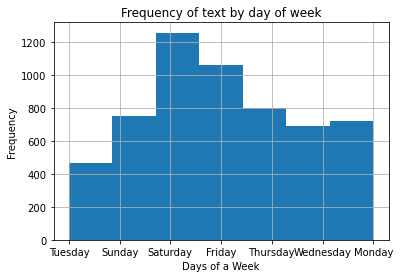

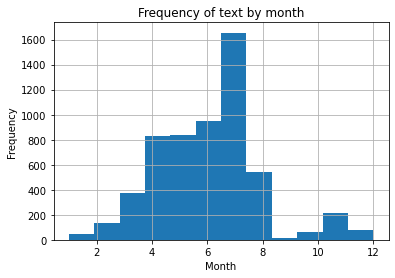

In [8]:
#we are plotting now

import matplotlib.pyplot as plt

# Create a histogram of frequency of text by day of week
df['day_of_week'].hist(bins=7)

# Set the labels and title
plt.xlabel('Days of a Week')
plt.ylabel('Frequency')
plt.title('Frequency of text by day of week')

# Display the histogram
plt.show()


# Create a histogram of frequency of text by day
df['month'].hist(bins=12)

# Set the labels and title
plt.xlabel('Month')
plt.ylabel('Frequency')
plt.title('Frequency of text by month')

# Display the histogram
plt.show()

#tbh the graphs above are not that informative


In [9]:
#the plot thickens

df['timestamp'] = pd.to_datetime(df['timestamp'], unit='s')  # Convert 'Timestamp' column to datetime

# Set the Timestamp column as the DataFrame index
df_copy=df.copy()
df_copy.set_index('timestamp', inplace=True)

# Count the number of rows for each day
summary_df = df_copy.resample('D').size().reset_index()
summary_df.columns = ['Date', 'Count']

# Display the summary DataFrame
summary_df


,Date,Count
0,2022-01-30,2
1,2022-01-31,0
2,2022-02-01,0
3,2022-02-02,0
4,2022-02-03,0
...,...,...
566,2023-08-19,14
567,2023-08-20,30
568,2023-08-21,3
569,2023-08-22,12


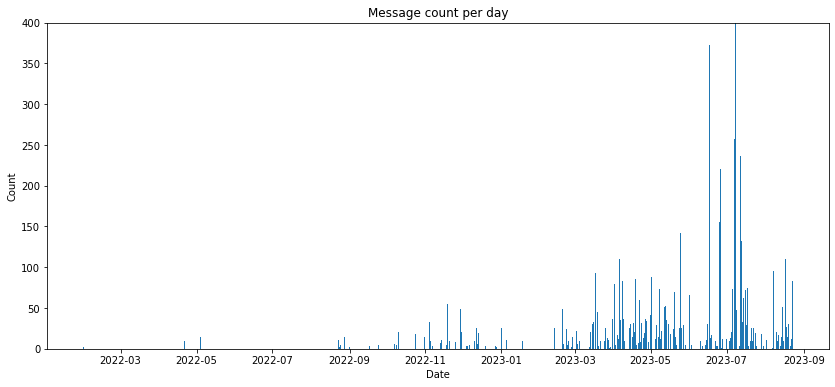

In [10]:
#an actual message by day count
# Create a bar plot
plt.figure(figsize=(14, 6))
plt.bar(summary_df['Date'], summary_df['Count'])
# Set the labels and title
plt.xlabel('Date')
plt.ylabel('Count')
plt.title('Message count per day')
plt.ylim(0,400)
# Display the plot
plt.show()

In [ ]:
df